#### TYPES TO HANDLE CATERGORICAL MISSING VALUES:

1. FREQUENT CATEGORY IMPUTATION.
2. ADDING A VARIABLE TO CAPTURE NAN.
        2a. Suppose if you have more frequent categories, we just replace NAN with a new category.

### 1. FREQUENT CATEFORY IMPUTATION:

1. DEFINITION: Frequent category imputation—or mode imputation—consists of replacing all occurrences of missing values (NA) within a variable with the mode, or the most frequent value.
2. This method is suitable for numerical and categorical variables, but in practice, we use this technique with categorical variables.

#### WHEN TO USE : 
    You can use this method when data is missing completely at random, and no more than 5% of the variable contains missing data.
    
#### Assumptions :
    1. Data is missing at random.
    2. The mising observations most likely look like the majority of the observations (i.e. the mode).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv(r"C:\Users\Harsh Jain\Desktop\HARSH JAIN\3. EVERYTHING RELATED TO DATA\DATA SCIENCE\DATASETS\Advanced-House-Price-Prediction--master\house_train.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [8]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [9]:
df.shape

(1460, 4)

In [11]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [12]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [13]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

#### INSIGHTS:
BsmtQual and GarageType has very less number of missing values: so we can replace then with most frequent value using this imputation technique.

#### Compute the frequency with every feature:

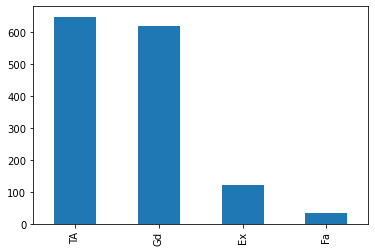

In [14]:
#### other method to display :  
#### df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

df['BsmtQual'].value_counts().plot.bar()

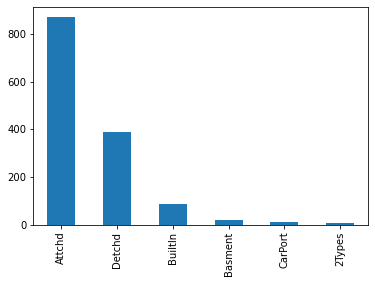

In [15]:
df['GarageType'].value_counts().plot.bar()

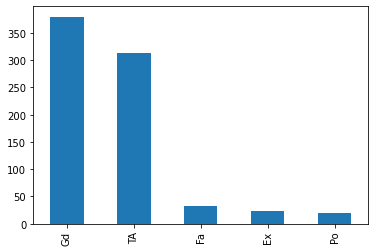

In [16]:
df['FireplaceQu'].value_counts().plot.bar()

In [19]:
print(df['BsmtQual'].mode()[0])
print(df['GarageType'].mode()[0])
print(df['FireplaceQu'].mode()[0])

TA
Attchd
Gd


In [17]:
### Function to impute the missing values with most frequent value.
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [20]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [21]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### The missing values are imputed.

#### ADVANTAGES AND DISADVANTAGES:

Advantages:
    1. Easy to implement.
    2. It’s a fast way to obtain a complete dataset.
    3. It can be used in production, i.e during model deployment

DisAdvantages:
    1. It distorts the relation of the most frequent label with other variables within the dataset.
    2. May lead to an over-representation of the most frequent label if there is are a lot of missing observations.

### 2. ADDING A VARIABLE TO CAPTURE NAN

#### Description: 
Replace NAN categories with most occurred values, and add a new feature to introduce some weight/importance to non-imputed and imputed observations.

#### Assumptions: 
No assumption, can be work with all type categorical columns.

In [22]:
df = pd.read_csv(r"C:\Users\Harsh Jain\Desktop\HARSH JAIN\3. EVERYTHING RELATED TO DATA\DATA SCIENCE\DATASETS\Advanced-House-Price-Prediction--master\house_train.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [23]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [24]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [25]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [28]:
frequent=df['BsmtQual'].mode()[0]

In [29]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [30]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [31]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### 2a. Suppose if you have more frequent categories, we just replace NAN with a new category

In [32]:
df = pd.read_csv(r"C:\Users\Harsh Jain\Desktop\HARSH JAIN\3. EVERYTHING RELATED TO DATA\DATA SCIENCE\DATASETS\Advanced-House-Price-Prediction--master\house_train.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [33]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [34]:
#### Function to replace the missing values with a new category:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [35]:
#### call the function:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [36]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


#### NOTE: 
THE MISSING VALUES ARE IMPUTED AND NOW DROP THE OLD COLUMNS TO REDUCE CURSE OF DIMENTIONALITY.

In [37]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [38]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
